# Get full time series data for:

entire Niskin data set /Nuts/Temp

measures of mixing:
- MLD2015 (own reanalysis of time series data)
- MLD2019 (own reanalysis of time series data)
- X21°C (own reanalysis of time series data)

measures of productivity: 
- Tchla HPLC
- Tchla fluoresence
- POC
- ...?


## 1. niskin data set DMO - read!

In [45]:
#install.packages("ncdf4")

In [165]:
require(ncdf4, warn.conflicts = FALSE);
require(ggplot2, warn.conflicts = FALSE);
require(cowplot, warn.conflicts = FALSE);
require(tidyverse, warn.conflicts = FALSE);
require(oce)

Loading required package: oce

Loading required package: testthat


Attaching package: ‘testthat’


The following object is masked from ‘package:dplyr’:

    matches


The following object is masked from ‘package:purrr’:

    is_null


Loading required package: gsw



In [47]:
# open a NetCDF file
niskdat <- nc_open("Data/niskin.netcdf")

#print(niskdat)

# Read entire ncdf file to r DataFrame

In [48]:
niskdat_df <- data.frame("Num" = 1:niskdat$dim$unlimited$len)
print('start')
for(i in 1:niskdat$nvars){
    #print(i)
    niskdat_df[paste(attributes(niskdat$var)$names[i])] <- ncvar_get(niskdat, attributes(niskdat$var)$names[i])
}
print('done reading')
head(niskdat_df)

[1] "start"
[1] "done reading"


Num,Cruise_number,Cruise_ID_1,Cruise_ID_2,Leg,Day,Month,Year,Latitude,Longitude,...,Bact_Biomass_uMC,Bio_cast_no,ISO_DateTime_start_hc_local,ISO_DateTime_end_hc_local,ISO_DateTime_start_bc_local,ISO_DateTime_end_bc_local,ISO_DateTime_start_hc_UTC,ISO_DateTime_end_hc_UTC,ISO_DateTime_start_bc_UTC,ISO_DateTime_end_bc_UTC
1,1,93HG_001,CAR-001,2,8,11,1995,10.5,-64.667,...,BM_master,2,1995-11-08T06:12:00,1995-11-08T06:38:00,1995-11-08T03:36:00,1995-11-08T03:54:00,1995-11-08T10:12:00,1995-11-08T10:38:00,1995-11-08T07:36:00,1995-11-08T07:54:00
2,1,93HG_001,CAR-001,2,8,11,1995,10.5,-64.667,...,BM_master,2,1995-11-08T06:12:00,1995-11-08T06:38:00,1995-11-08T03:36:00,1995-11-08T03:54:00,1995-11-08T10:12:00,1995-11-08T10:38:00,1995-11-08T07:36:00,1995-11-08T07:54:00
3,1,93HG_001,CAR-001,2,8,11,1995,10.5,-64.667,...,BM_master,2,1995-11-08T06:12:00,1995-11-08T06:38:00,1995-11-08T03:36:00,1995-11-08T03:54:00,1995-11-08T10:12:00,1995-11-08T10:38:00,1995-11-08T07:36:00,1995-11-08T07:54:00
4,1,93HG_001,CAR-001,2,8,11,1995,10.5,-64.667,...,BM_master,2,1995-11-08T06:12:00,1995-11-08T06:38:00,1995-11-08T03:36:00,1995-11-08T03:54:00,1995-11-08T10:12:00,1995-11-08T10:38:00,1995-11-08T07:36:00,1995-11-08T07:54:00
5,1,93HG_001,CAR-001,2,8,11,1995,10.5,-64.667,...,BM_master,2,1995-11-08T06:12:00,1995-11-08T06:38:00,1995-11-08T03:36:00,1995-11-08T03:54:00,1995-11-08T10:12:00,1995-11-08T10:38:00,1995-11-08T07:36:00,1995-11-08T07:54:00
6,1,93HG_001,CAR-001,2,8,11,1995,10.5,-64.667,...,BM_master,2,1995-11-08T06:12:00,1995-11-08T06:38:00,1995-11-08T03:36:00,1995-11-08T03:54:00,1995-11-08T10:12:00,1995-11-08T10:38:00,1995-11-08T07:36:00,1995-11-08T07:54:00


## get temp & nuts over depth

In [49]:
cat(names(niskdat_df))

Num Cruise_number Cruise_ID_1 Cruise_ID_2 Leg Day Month Year Latitude Longitude Hydro_cast_no Depth_target Depth_real O2_ml_L q_O2_ml_L O2_umol_kg q_O2_umol_kg NO3_UDO q_NO3_UDO PO4_UDO q_PO4_UDO SiO4_UDO q_SiO4_UDO NH4_USF q_NH4_USF NO2_USF q_NO2_USF NO3_NO2_USF q_NO3_NO3_USF PO4_USF q_PO4_USF SiO4_USF q_SiO4_USF pH q_pH Alkalinity_mol_kg q_Alkalinity_mol_kg Alkalinity_umol_kg q_Alkalinity_umol_kg TCO2 q_TCO2 fCO2 q_fCO2 pH_corrected q_pH_corrected TCO2_corrected q_TCO2_corrected fCO2_corrected q_fCO2_corrected Salinity_bottles q_Salinity_bottles Salinity_CTD q_Salinity_CTD Temperature q_Temperature Sigma_t q_Sigma_t TPP q_TPP PIP q_PIP POC_ug_kg q_POC_ug_kg PON_ug_kg q_PON_ug_kg POC_ug_L q_POC_ug_L PN_ug_L q_PN_ug_L C_N_particulate q_C_N_particulate DON q_DON DOP q_DOP DOC q_DOC TOC q_TOC PrimaryProductivity q_PrimaryProductivity Chlorophyll q_Chlorophyll Phaeopigments q_Phaeopigments Total_Prokaryotes Bact_Biomass_mgC_m3 Bact_Biomass_uMC Bio_cast_no ISO_DateTime_start_hc_local ISO_D

In [50]:
niskdat_df$Day[1]
niskdat_df$Month[1]
niskdat_df$Year[1]

as.Date(niskdat_df$ISO_DateTime_end_bc_local[1])

[1] "8"

[1] "11"

[1] "1995"

[1] "1995-11-08"

In [79]:
substr(niskdat_df$ISO_DateTime_end_bc_local[1], 0, 10)

[1] "1995-11-08"

In [172]:
niskdat_df$date <- as.Date(substr(niskdat_df$ISO_DateTime_end_hc_UTC, 0, 10))

niskdat_df$Depth_real <- as.numeric(niskdat_df$Depth_real)
niskdat_df$Depth_target <- as.numeric(niskdat_df$Depth_target)

niskdat_df$Temperature <- as.numeric(niskdat_df$Temperature)
niskdat_df$NO3_NO2_USF <- as.numeric(niskdat_df$NO3_NO2_USF)
niskdat_df$SiO4_USF <- as.numeric(niskdat_df$SiO4_USF)
niskdat_df$PO4_USF <- as.numeric(niskdat_df$PO4_USF)

In [101]:
TempNuts <- data.frame(date = niskdat_df$date, Depth_real = niskdat_df$Depth_real, Temperature = niskdat_df$Temperature, 
                       NO3_NO2_USF = niskdat_df$NO3_NO2_USF, SiO4_USF = niskdat_df$SiO4_USF,
                      PO4_USF = niskdat_df$PO4_USF)

In [102]:
TempNutsAbove250 <- TempNuts[TempNuts$Depth_real<180,]

In [103]:
TempNutsFull_Plot <- ggplot(data=TempNuts, aes(x=Temperature,y=NO3_NO2_USF, col=Depth_real)) + geom_point() + theme_cowplot(20)

In [104]:
TempNutsAbove180_Plot <- ggplot(data=TempNutsAbove250, aes(x=Temperature,y=NO3_NO2_USF, col=Depth_real)) + geom_point() + theme_cowplot(20)

In [105]:
TempPO4Above180_Plot <- ggplot(data=TempNutsAbove250, aes(x=Temperature,y=PO4_USF, col=Depth_real)) + geom_point() + theme_cowplot(20)

In [106]:
TempSiO4Above180_Plot <- ggplot(data=TempNutsAbove250, aes(x=Temperature,y=SiO4_USF, col=Depth_real)) + geom_point() + theme_cowplot(20)

In [107]:
#ggsave('Cariaco.pdf')

## CREATE THESE SAME PLOTS for other nutrients!

Warning message:
“Removed 612 rows containing missing values (geom_point).”
Warning message:
“Removed 311 rows containing missing values (geom_point).”
Warning message:
“Removed 311 rows containing missing values (geom_point).”
Warning message:
“Removed 322 rows containing missing values (geom_point).”


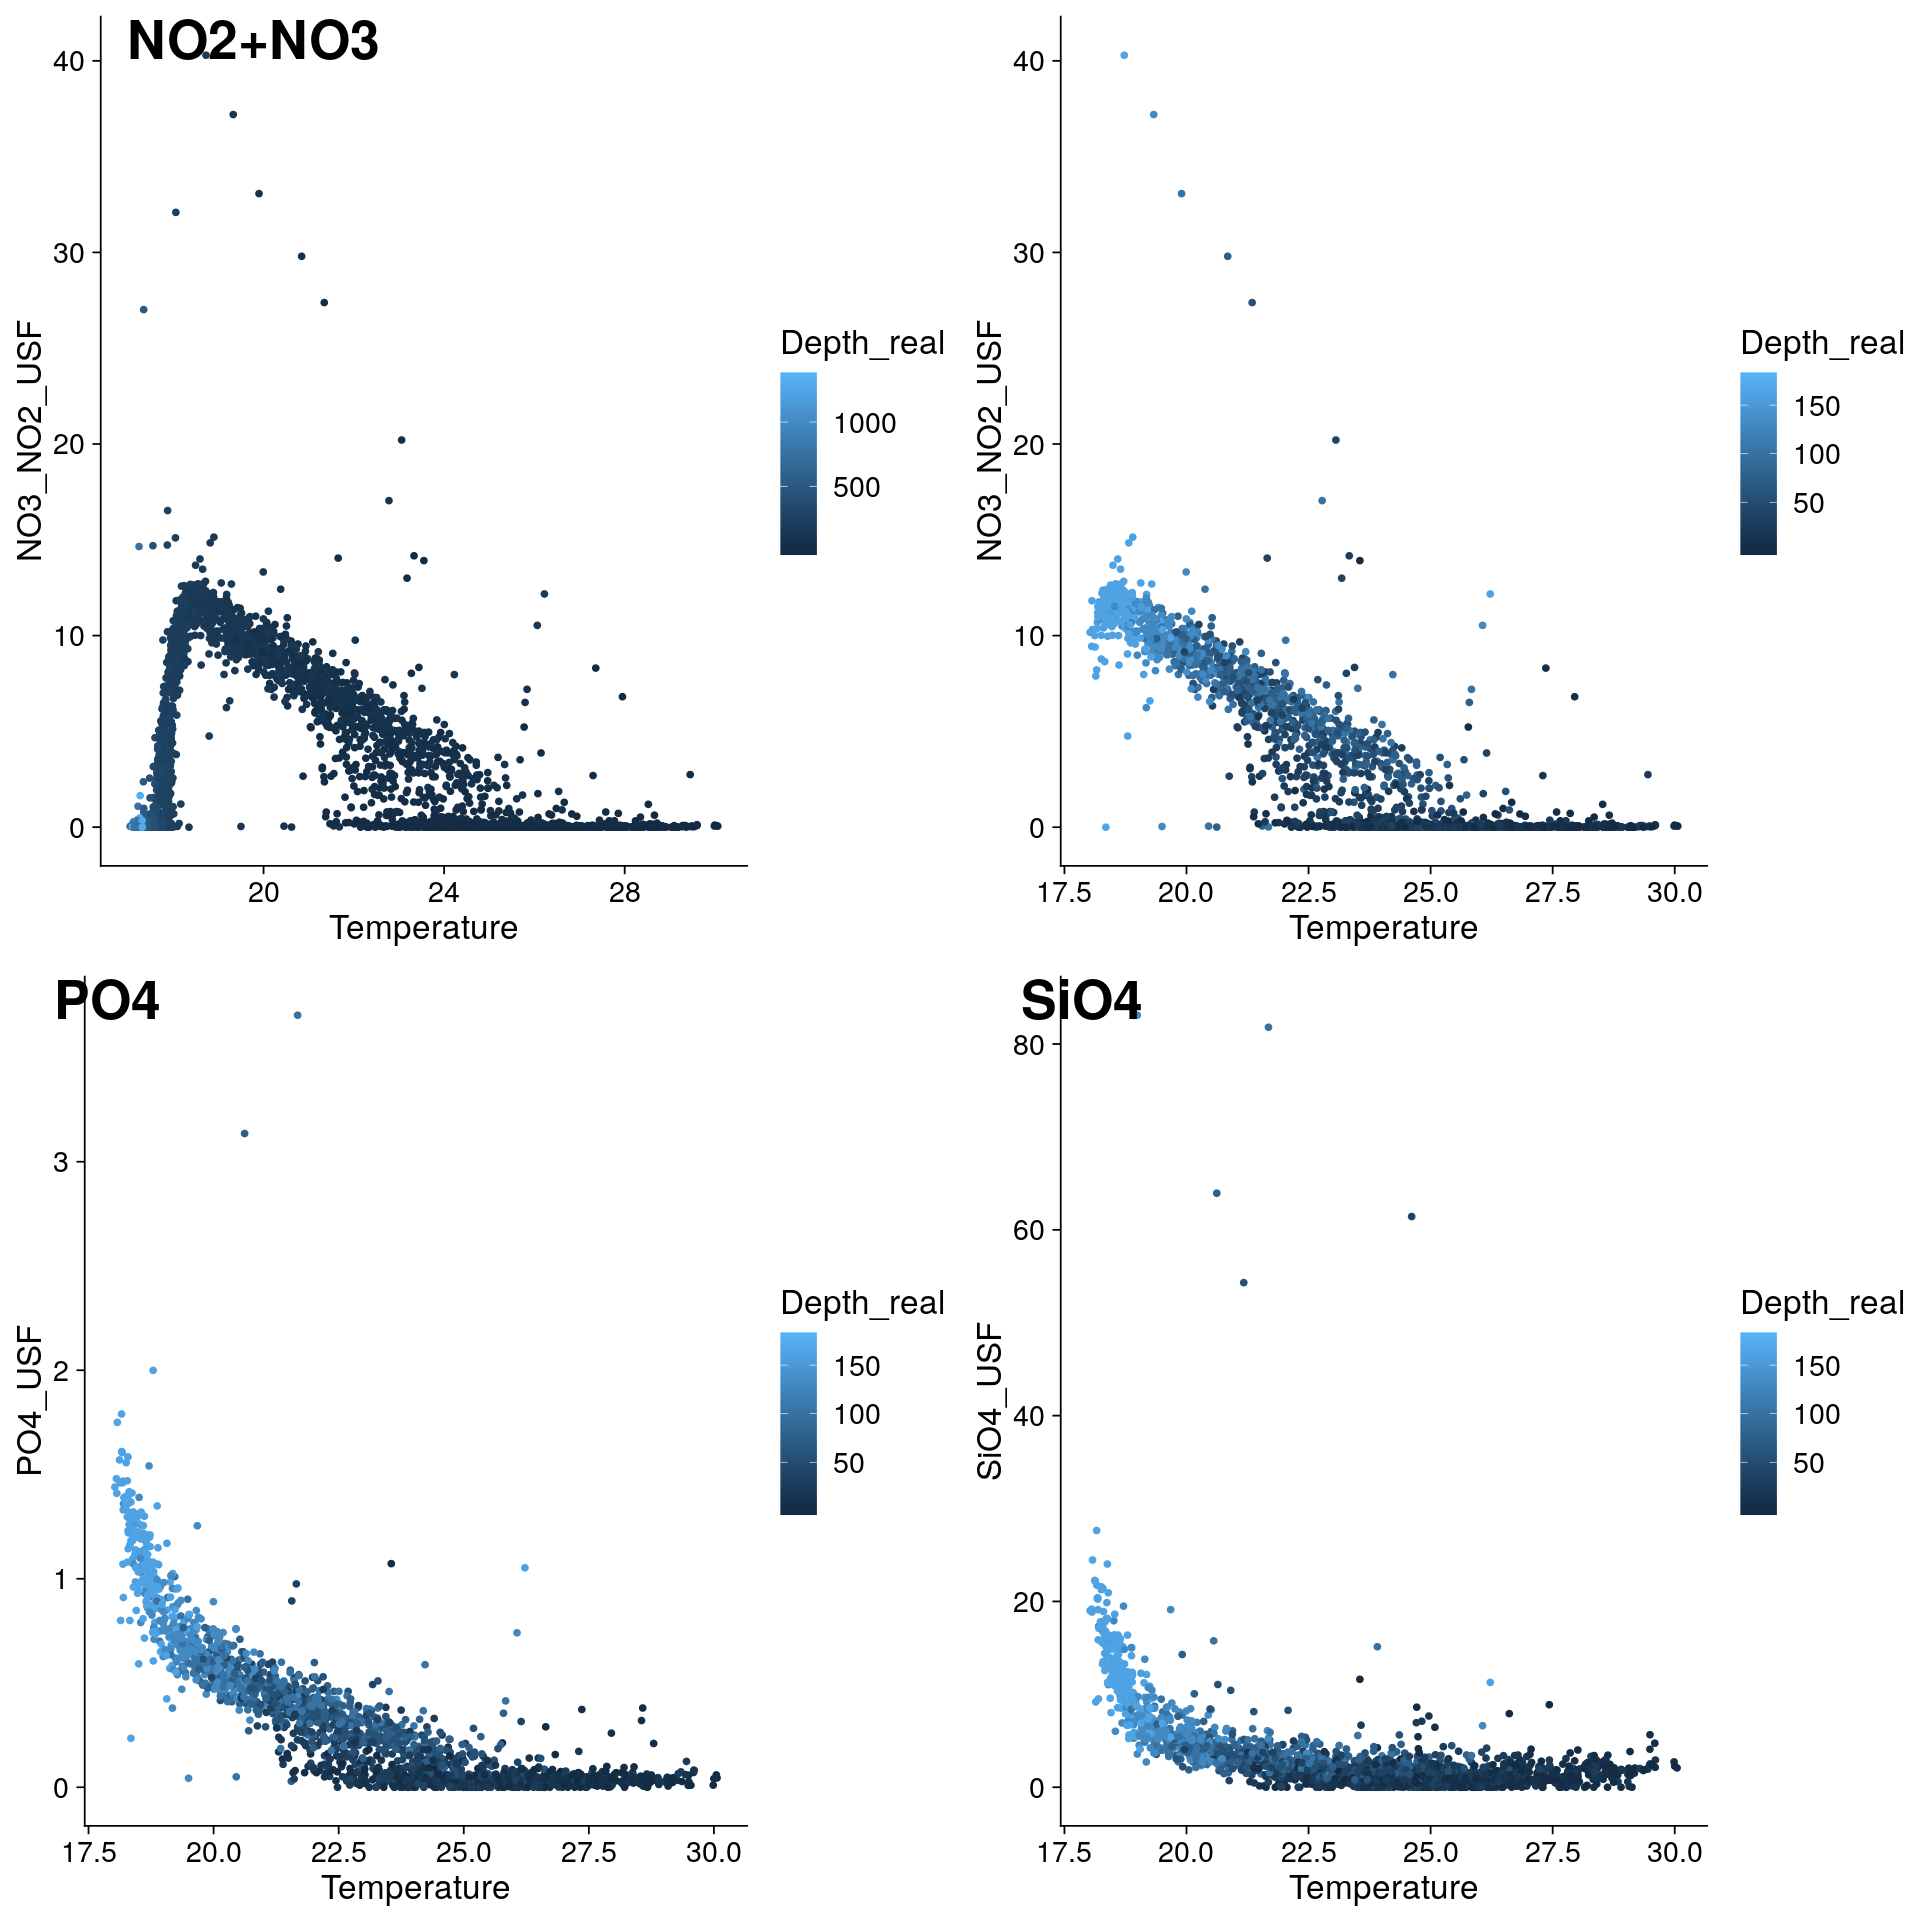

In [108]:
options(repr.plot.width=16, repr.plot.height=16)
plot_grid(TempNutsFull_Plot, TempNutsAbove180_Plot, 
          TempPO4Above180_Plot,TempSiO4Above180_Plot,
          labels = c('NO2+NO3', '','PO4','SiO4'), label_size = 32)

## OK, next check productivity

### get Chl & POC over depth

In [109]:
niskdat_df$O2_umol_kg <- as.numeric(niskdat_df$O2_umol_kg)
niskdat_df$POC_ug_kg <- as.numeric(niskdat_df$POC_ug_kg)
niskdat_df$PON_ug_kg <- as.numeric(niskdat_df$PON_ug_kg)
niskdat_df$PN_ug_L <- as.numeric(niskdat_df$PN_ug_L)

niskdat_df$C_N_particulate <- as.numeric(niskdat_df$C_N_particulate)
niskdat_df$PIP <- as.numeric(niskdat_df$PIP)
niskdat_df$TPP <- as.numeric(niskdat_df$TPP)
niskdat_df$DOC <- as.numeric(niskdat_df$DOC)
niskdat_df$PrimaryProductivity <- as.numeric(niskdat_df$PrimaryProductivity)
niskdat_df$Chlorophyll <- as.numeric(niskdat_df$Chlorophyll)
niskdat_df$Phaeopigments <- as.numeric(niskdat_df$Phaeopigments)


In [110]:
TempNuts2 <- data.frame(date = niskdat_df$date, Depth_real = niskdat_df$Depth_real, Temperature = niskdat_df$Temperature, 
                       O2_umol_kg = niskdat_df$O2_umol_kg, 
                       POC_ug_kg = niskdat_df$POC_ug_kg, 
                       PON_ug_kg = niskdat_df$PON_ug_kg, 
                       PN_ug_L = niskdat_df$PN_ug_L,
                       PO4_USF = niskdat_df$PO4_USF,
                       C_N_particulate = niskdat_df$C_N_particulate, 
                       PIP = niskdat_df$PIP, 
                       TPP = niskdat_df$TPP, 
                       DOC = niskdat_df$DOC,
                       PrimaryProductivity = niskdat_df$PrimaryProductivity,
                       Chlorophyll = niskdat_df$Chlorophyll, 
                       Phaeopigments = niskdat_df$Phaeopigments
                      )

In [111]:
TempNuts2Above250 <- TempNuts2[TempNuts2$Depth_real<180,]

In [112]:
ChlvsPOCAbove180_Plot <- ggplot(data=TempNuts2Above250, aes(x=POC_ug_kg,y=Chlorophyll, col=Depth_real)) + geom_point() + theme_cowplot(20) + ylim(0,1.5)

In [113]:
CNvsDepth_Plot <- ggplot(data=TempNuts2Above250, aes(x=C_N_particulate,y=Depth_real)) + geom_point() + theme_cowplot(20)

In [114]:
TPP_CHL_Plot <- ggplot(data=TempNuts2Above250, aes(x=TPP,y=Chlorophyll, col=Depth_real)) + geom_point() + theme_cowplot(20)

In [115]:
#ChlvsPOCAbove180_Plot
#CNvsDepth_Plot
#TPP_CHL_Plot

# Get other Chlorophyll and mixing measures!

In [143]:
# where to get Fluoresence & HPLC data from?
PinckHPLC_1 <- read.csv("IntegratedValues_PINCKNEY.csv",sep=';',dec=',')

In [145]:
#PinckHPLC_1

In [ ]:
PinckHPLC_IN <- read.csv("PINTDF_integratedChlorophyll.csv")

In [125]:
PinckHPLC_IN$date <- as.Date(PinckHPLC_IN$Date)

In [126]:
PinckHPLC_INTchla <- PinckHPLC_IN[PinckHPLC_IN$spec == 'Tchla',]

In [128]:
head(PinckHPLC_INTchla)

X,Date,val,spec,date
1,1995-12-14,13.54,Tchla,1995-12-14
2,1996-01-13,44.21,Tchla,1996-01-13
3,1996-02-14,28.77,Tchla,1996-02-14
4,1996-03-13,21.26,Tchla,1996-03-13
5,1996-04-17,171.92,Tchla,1996-04-17
6,1996-05-10,44.24,Tchla,1996-05-10


In [136]:
HPLC_INT = data.frame('date' = PinckHPLC_INTchla$date, 'HPLC_Tchla' = PinckHPLC_INTchla$val)

In [137]:
head(HPLC_INT)

date,HPLC_Tchla
1995-12-14,13.54
1996-01-13,44.21
1996-02-14,28.77
1996-03-13,21.26
1996-04-17,171.92
1996-05-10,44.24


In [147]:
TempNuts2Above100 <- TempNuts2[TempNuts2$Depth_real<105,]

In [200]:
integrate <- function(DF, spec="trap"){
    if(spec=="trap"){
        DF_1 <- DF %>%
            group_by(date, depth) %>%
            summarise(value = mean(value))
        print(tail(DF_1,n=11))
        DF_int <- DF_1 %>%
            group_by(date) %>%
            do(data.frame(value_int = with(.,integrateTrapezoid(x=depth, y=value))))
    
        }else{
            DF_1 <- DF %>%
            group_by(date,depth) %>%
            summarise(value = mean(value))
        
        DFtest <- DF_1 %>%
            group_by(date) %>%
            filter(sum(!is.na(value))>2) %>%
            do(data.frame(middepth = as.numeric(stats::filter(.$depth, c(0.5,0.5))), midval = as.numeric(stats::filter(.$value, c(0.5,0.5)))))
        DFtest <- na.omit(DFtest)
        print(tail(DF_1,n=10))
        DF_int <- DFtest %>%
        group_by(date) %>%
        do(data.frame(value_int = with(.,integrateTrapezoid(x=middepth, y=midval))))
        print(head(DF_int))
        
    }
    return(DF_int)
}

In [201]:
prep_df_ntrplt <- function(dataframe){
    colnames(dataframe) <- c("date", "depth","value")
    return(dataframe)
}

In [202]:
ChlaDDV <- data.frame(date = niskdat_df$date, Depth_target = niskdat_df$Depth_target ,Chlorophyll = niskdat_df$Chlorophyll)

In [203]:
ChlaDDV <- ChlaDDV[ChlaDDV$Depth_target < 105,]

In [204]:
ChlaDDVx <- prep_df_ntrplt(ChlaDDV)
head(ChlaDDVx)

date,depth,value
1995-11-08,1,0.0940762
1995-11-08,7,0.0746952
1995-11-08,15,0.1000480
1995-11-08,25,0.1180140
1995-11-08,35,0.1314760
1995-11-08,55,0.4180000


In [205]:
ChlaXXX <- integrate(ChlaDDVx)

# A tibble: 11 x 3
# Groups:   date [2]
   date       depth   value
   <date>     <dbl>   <dbl>
 1 2017-01-12    55  0.189 
 2 2017-01-12    75  0.0614
 3 2017-01-12   100  0.0598
 4 NA             7  0.33  
 5 NA            15  0.28  
 6 NA            25  0.56  
 7 NA            35  1.46  
 8 NA            55  1.31  
 9 NA            75 NA     
10 NA           100 NA     
11 NA            NA NA     


In [184]:
Test1 = merge(HPLC_INT,TempNuts2Above100)

In [186]:
Test2 = merge(HPLC_INT,ChlaXXX)

In [192]:
tail(ChlaXXX)

date,value_int
2016-05-11,19.88620
2016-06-07,12.07000
2016-09-20,24.70185
2016-12-21,24.85764
2017-01-12,40.31706
NA,NA


In [185]:
head(Test1)

date,HPLC_Tchla,Depth_real,Temperature,O2_umol_kg,POC_ug_kg,PON_ug_kg,PN_ug_L,PO4_USF,C_N_particulate,PIP,TPP,DOC,PrimaryProductivity,Chlorophyll,Phaeopigments
1996-03-13,21.26,76.0,20.3546,117.642,25.595,5.040,24.9780,NA,4.91851,NA,NA,NA,0.0373795,0.0482952,0.08
1996-03-13,21.26,7.0,22.6256,238.643,627.770,63.100,612.6380,NA,61.57900,NA,NA,NA,14.0344000,2.7992400,1.53
1996-03-13,21.26,35.0,21.4272,132.989,65.150,13.165,63.5796,NA,12.84770,NA,NA,NA,0.0000000,0.1158670,0.17
1996-03-13,21.26,101.5,19.9429,121.767,22.030,4.575,21.4990,NA,4.46472,NA,NA,NA,0.0000000,0.0599238,0.08
1996-03-13,21.26,56.0,20.9104,133.705,25.100,5.440,24.4950,NA,5.30887,NA,NA,NA,0.0037893,0.0589810,0.10
1996-03-13,21.26,1.5,22.8689,244.011,753.380,74.290,735.2200,NA,72.49930,NA,NA,NA,16.7385000,3.2100000,1.16


Warning message:
“Removed 1 rows containing missing values (geom_point).”


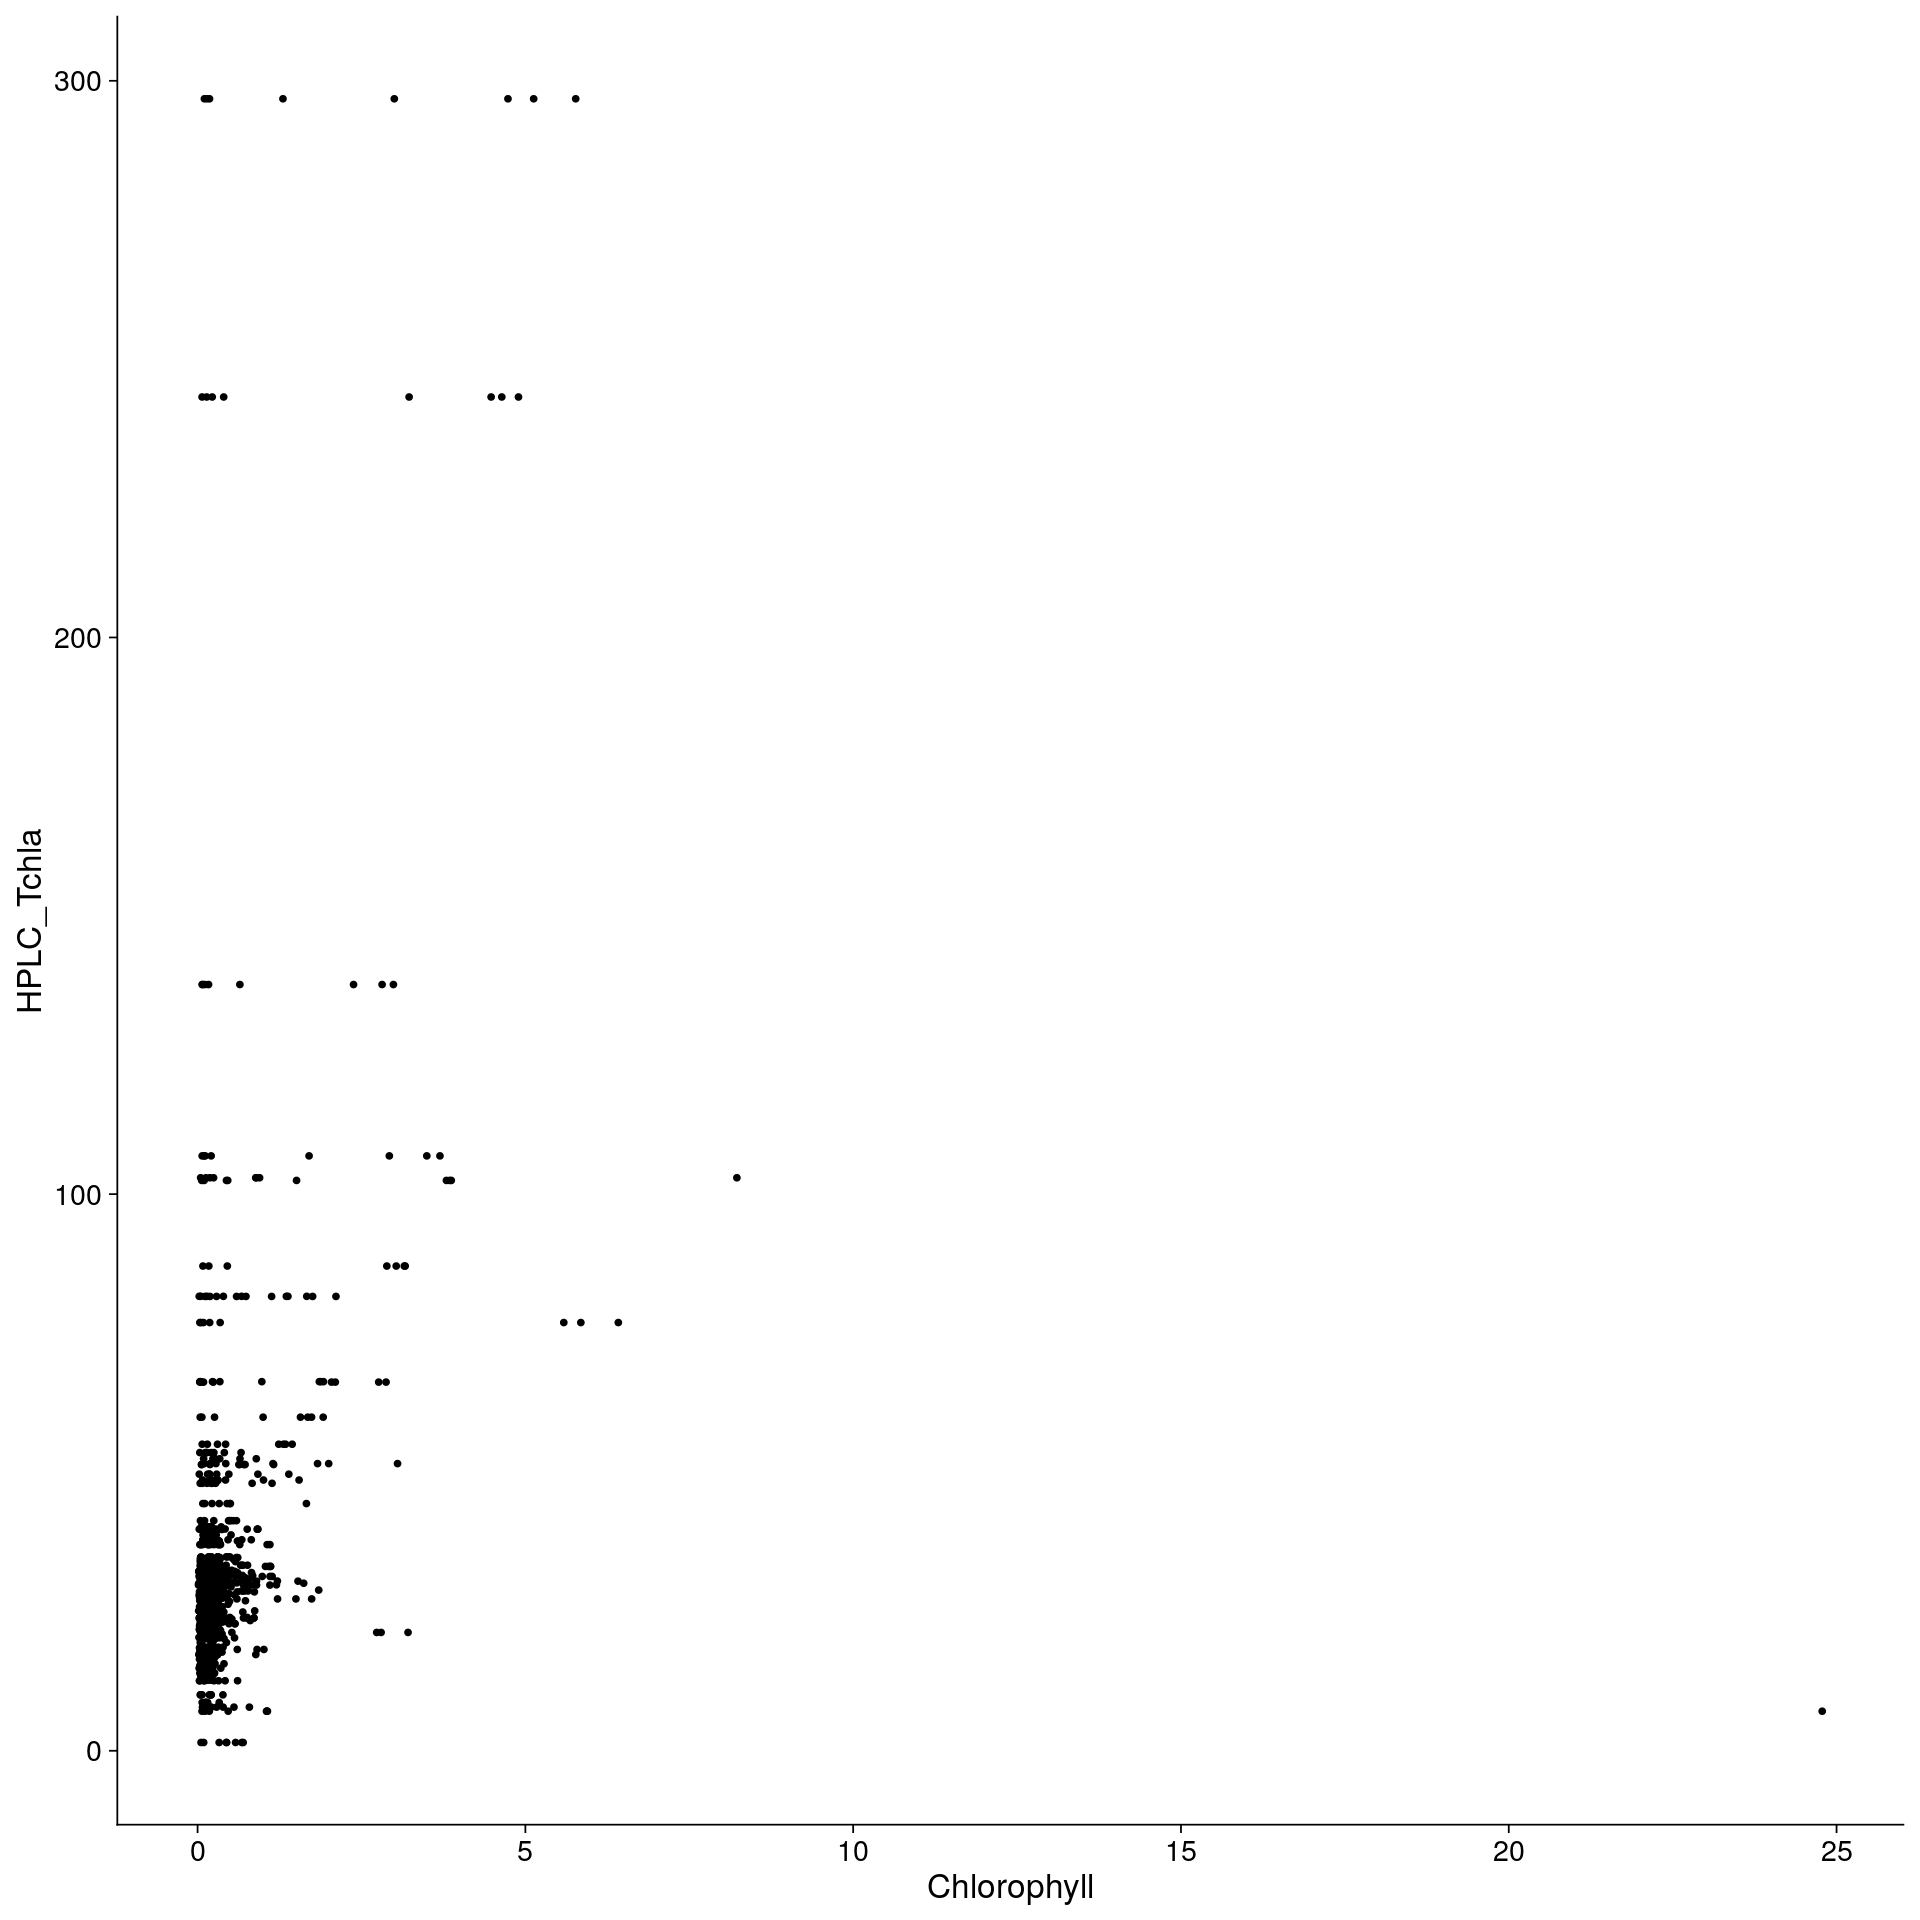

In [151]:
ggplot(data=Test1, aes(x=Chlorophyll,y=HPLC_Tchla)) + geom_point() + theme_cowplot(20)

FLChla = milligrams/meter^3 (mg/m^3)

HPLCChla = mg/m^3

In [217]:
CHlaHPLCFluorCOMP <- ggplot(data=Test2, aes(x=value_int,y=HPLC_Tchla)) + geom_point() + theme_cowplot(20) + ylab('HPLC chlorophyll [mg m⁻³]') + xlab('fluorescence chlorophyll [mg m⁻³]') + ylim(0,300)+xlim(0,300)

In [191]:
str(Test2)

'data.frame':	134 obs. of  3 variables:
 $ date      : Date, format: "1996-03-13" "1996-09-11" ...
 $ HPLC_Tchla: num  21.3 32.2 31.5 51.6 27.3 ...
 $ value_int : num  63.8 21.7 30.7 75.3 42.6 ...


Warning message:
“Removed 1 rows containing missing values (geom_point).”
Warning message:
“Removed 311 rows containing missing values (geom_point).”
Warning message:
“Removed 311 rows containing missing values (geom_point).”
Warning message:
“Removed 322 rows containing missing values (geom_point).”


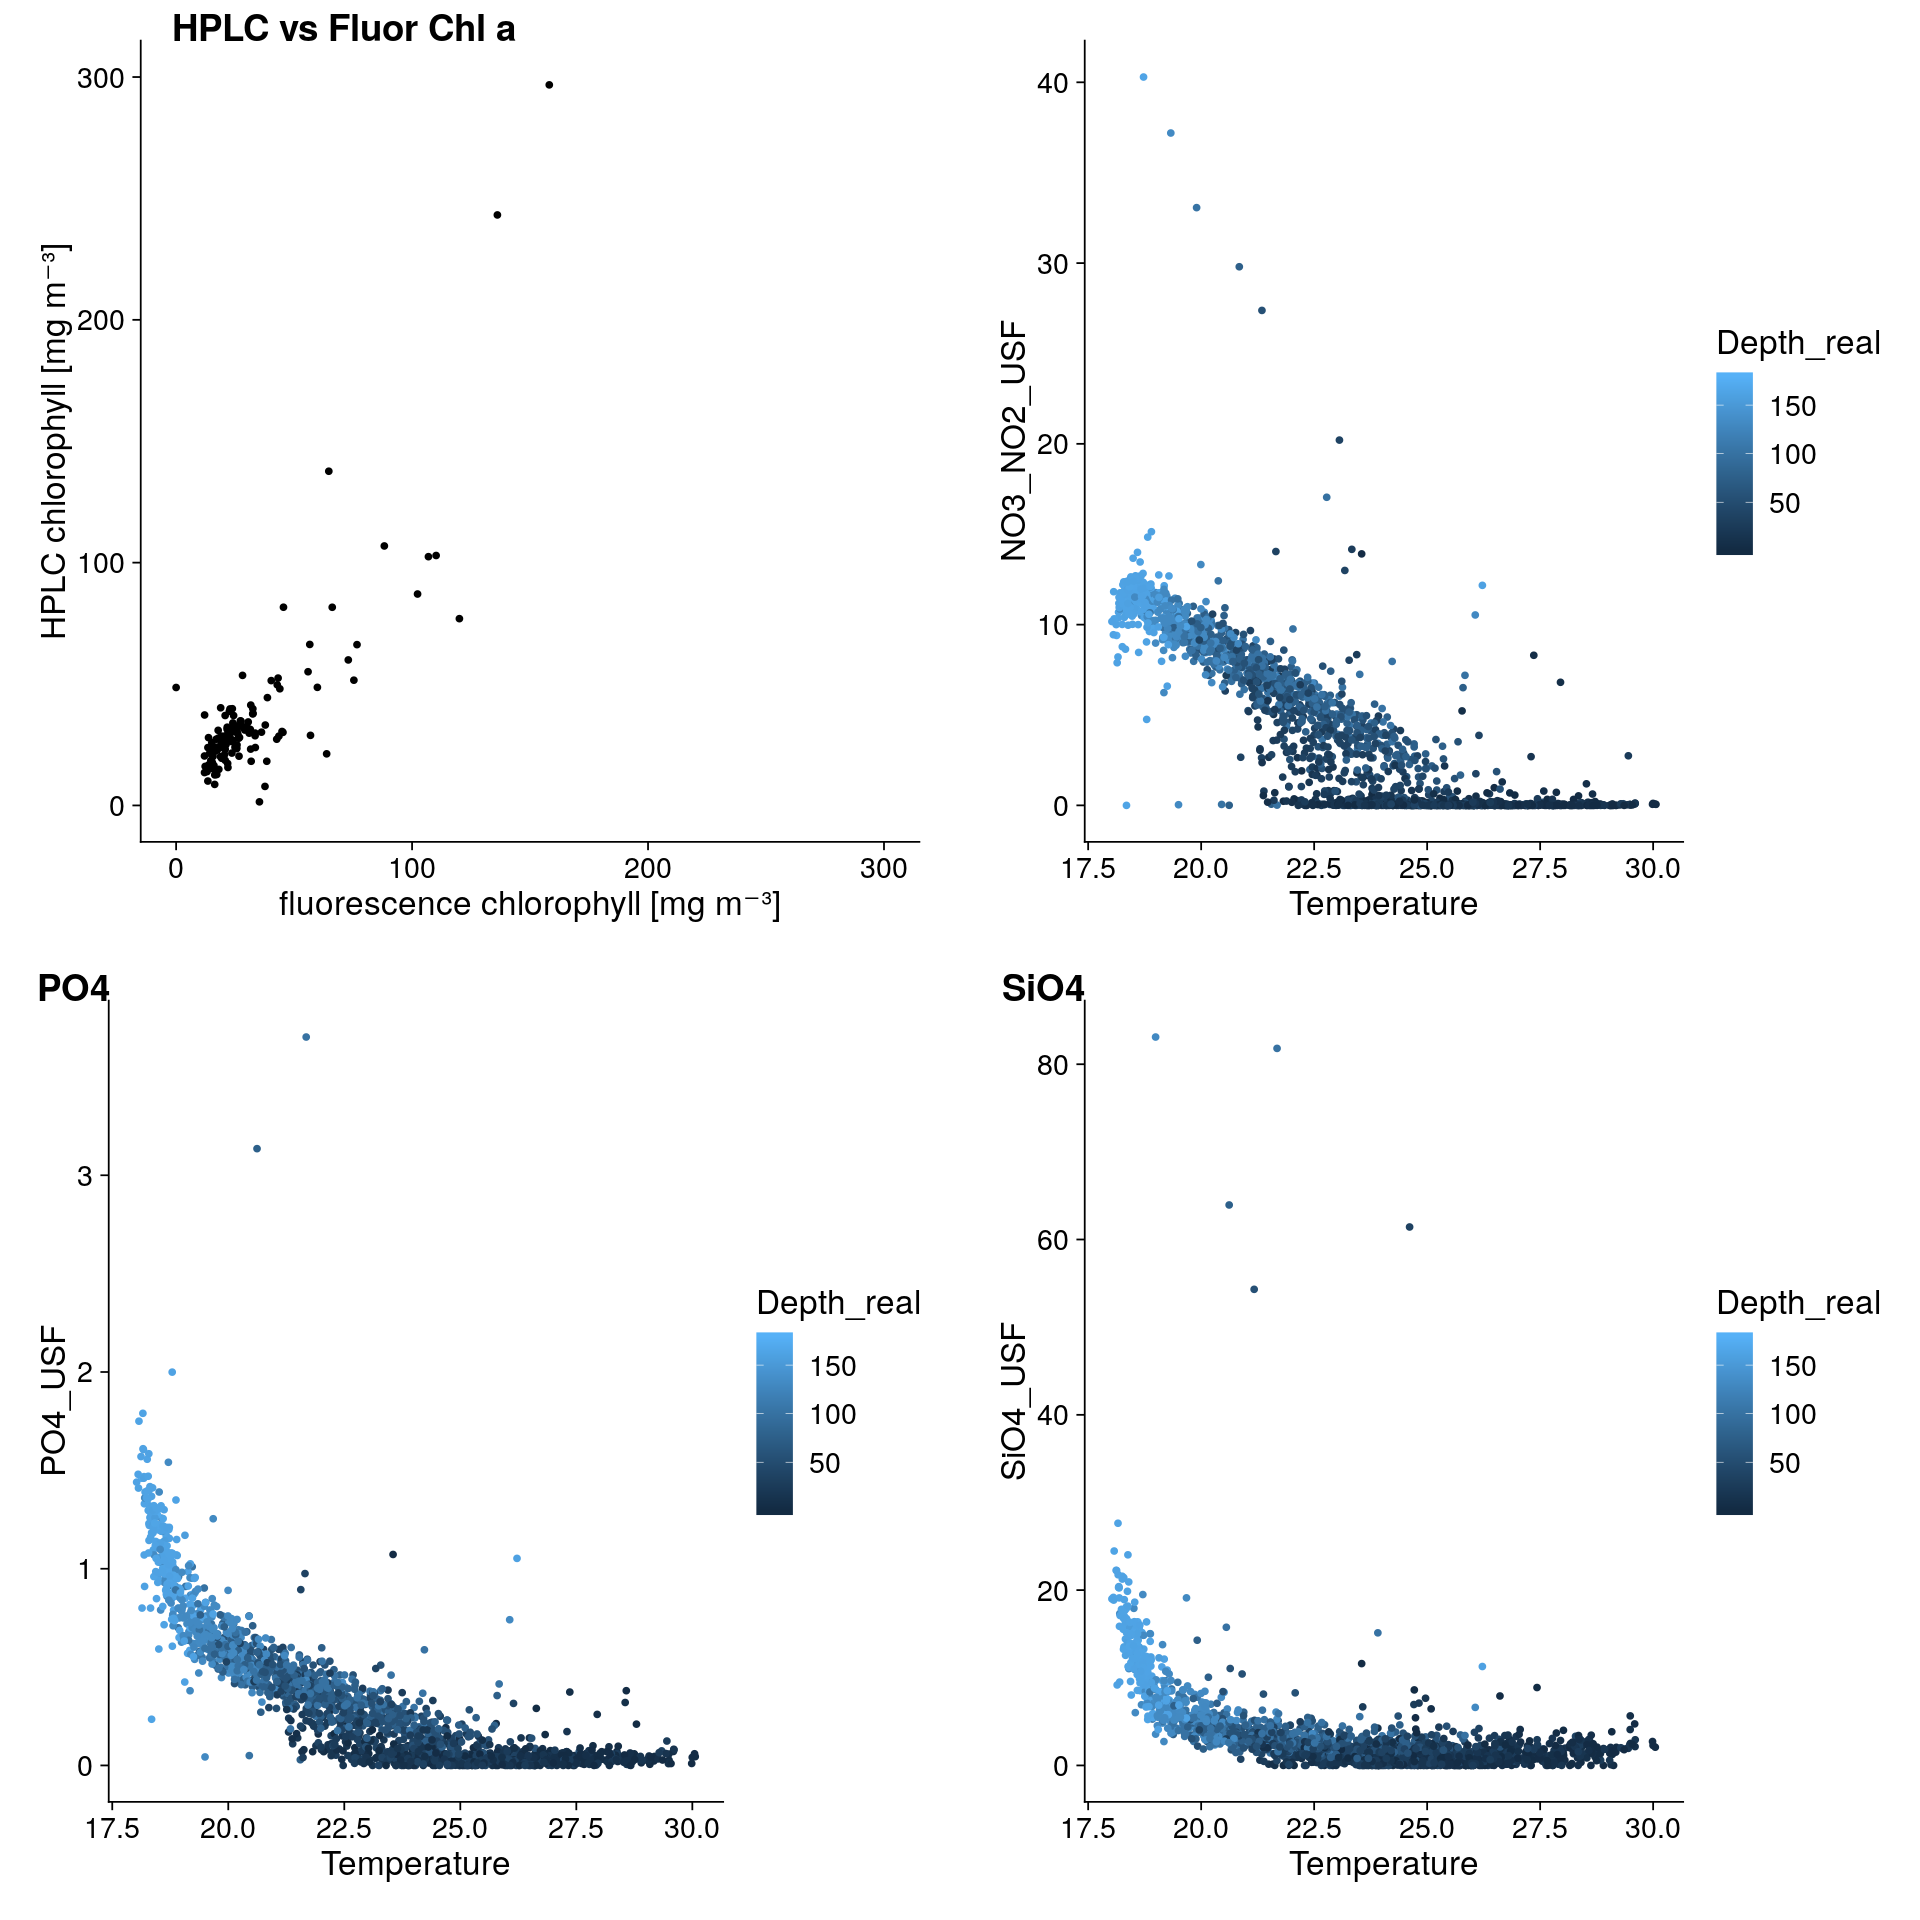

In [224]:
plot_grid(CHlaHPLCFluorCOMP, TempNutsAbove180_Plot, 
          TempPO4Above180_Plot,TempSiO4Above180_Plot,
          labels = c('HPLC vs Fluor Chl a', '','PO4','SiO4'), label_size = 22, scale=0.95)

# NOW do the same for POC comparisons! 
1. interpolate vals

In [226]:
#niskdat_df$date

In [234]:
POCDDV <- data.frame(date = niskdat_df$date, Depth_target = niskdat_df$Depth_target , POC = niskdat_df$POC_ug_kg)

In [235]:
POCDDVx <- POCDDV[POCDDV$Depth_target < 105,]

In [236]:
POCDDVx2 <- prep_df_ntrplt(POCDDVx)
head(POCDDVx2)

date,depth,value
1995-11-08,1,NA
1995-11-08,7,NA
1995-11-08,15,NA
1995-11-08,25,NA
1995-11-08,35,NA
1995-11-08,55,NA


In [237]:
POCXXX <- integrate(POCDDVx2)

# A tibble: 11 x 3
# Groups:   date [2]
   date       depth value
   <date>     <dbl> <dbl>
 1 2017-01-12    55  79.0
 2 2017-01-12    75  59.6
 3 2017-01-12   100  58.7
 4 NA             7  NA  
 5 NA            15  NA  
 6 NA            25  NA  
 7 NA            35  NA  
 8 NA            55  NA  
 9 NA            75  NA  
10 NA           100  NA  
11 NA            NA  NA  


In [243]:
names(ChlaXXX) #<- c('date','Chla')
chlaPOC <- merge(POCXXX,ChlaXXX)

[1] "date" "Chla"

In [238]:
Test3 = merge(HPLC_INT,POCXXX)

Warning message:
“Removed 19 rows containing missing values (geom_point).”


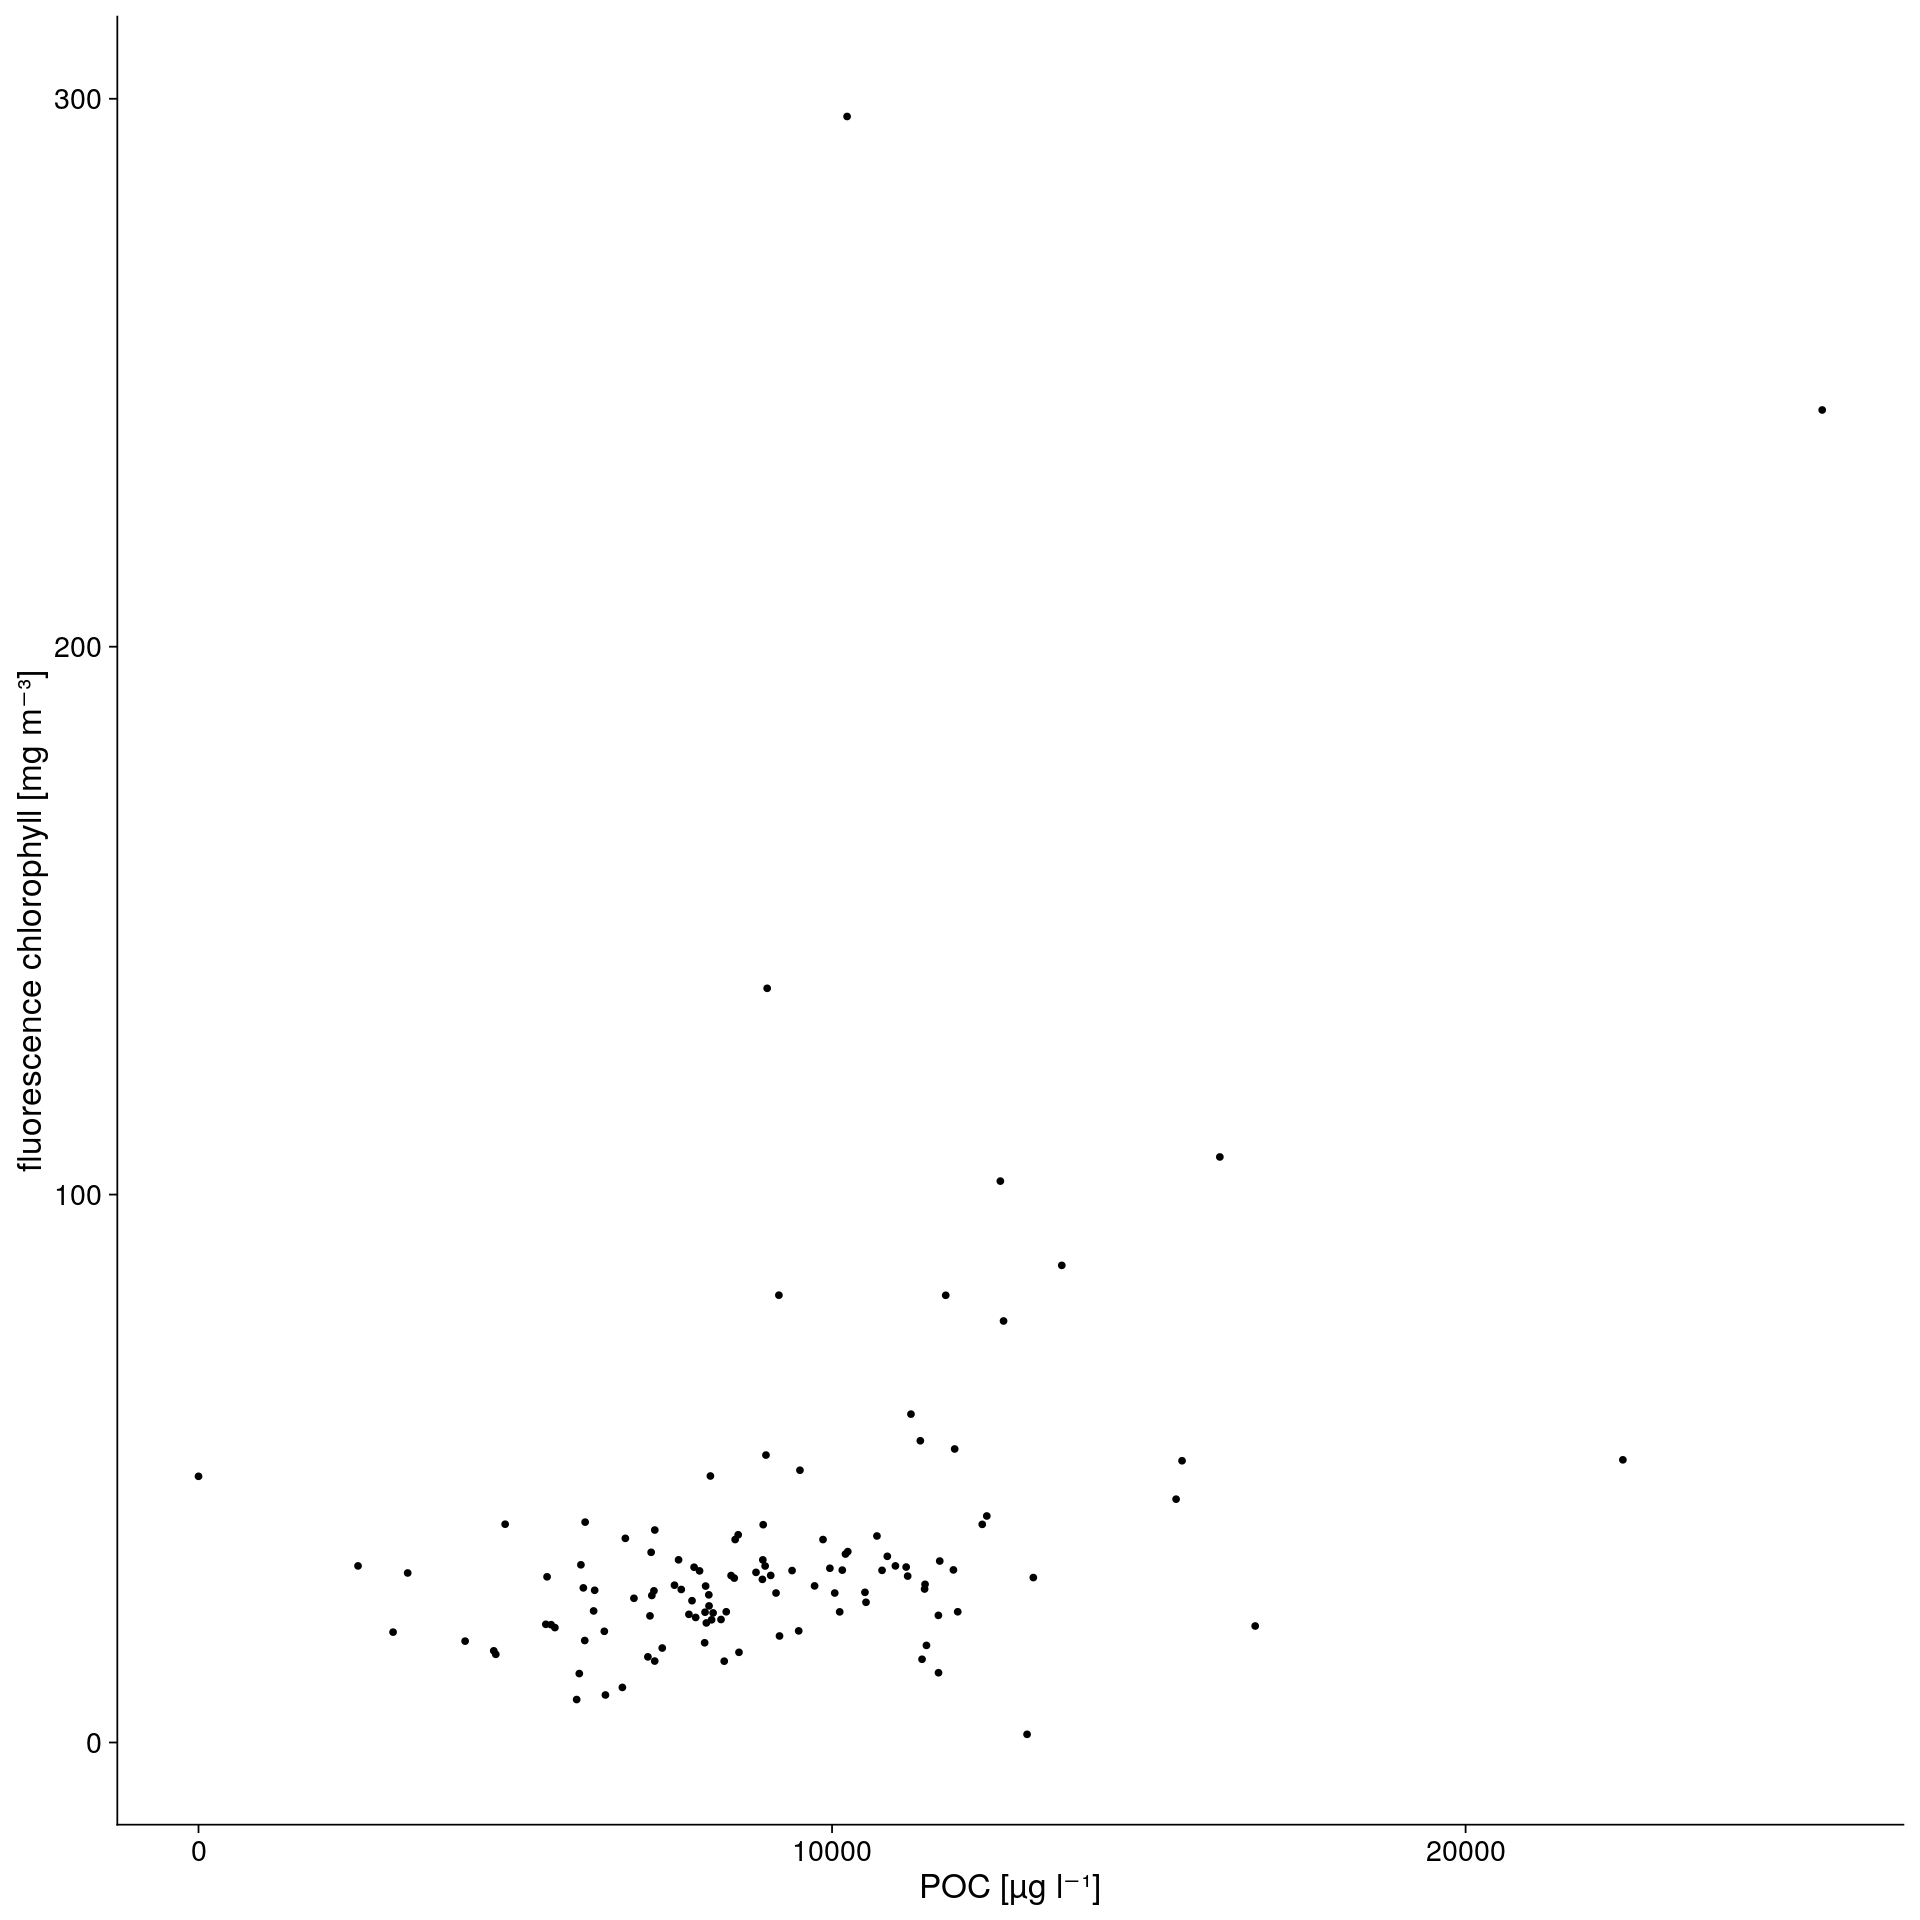

In [249]:
#CHlaHPLCFluorCOMP <- 
ggplot(data=Test3, aes(x=value_int,y=HPLC_Tchla)) + 
geom_point() + theme_cowplot(20)+ 
ylab('fluorescence chlorophyll [mg m⁻³]') + xlab('POC [µg l⁻¹]') + ylim(0,300)#+xlim(0,300)

In [246]:
cor.test(Test3$value_int,Test3$HPLC_Tchla)


	Pearson's product-moment correlation

data:  Test3$value_int and Test3$HPLC_Tchla
t = 4.9923, df = 113, p-value = 2.186e-06
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.2624039 0.5642774
sample estimates:
      cor 
0.4250893 


Warning message:
“Removed 40 rows containing missing values (geom_point).”


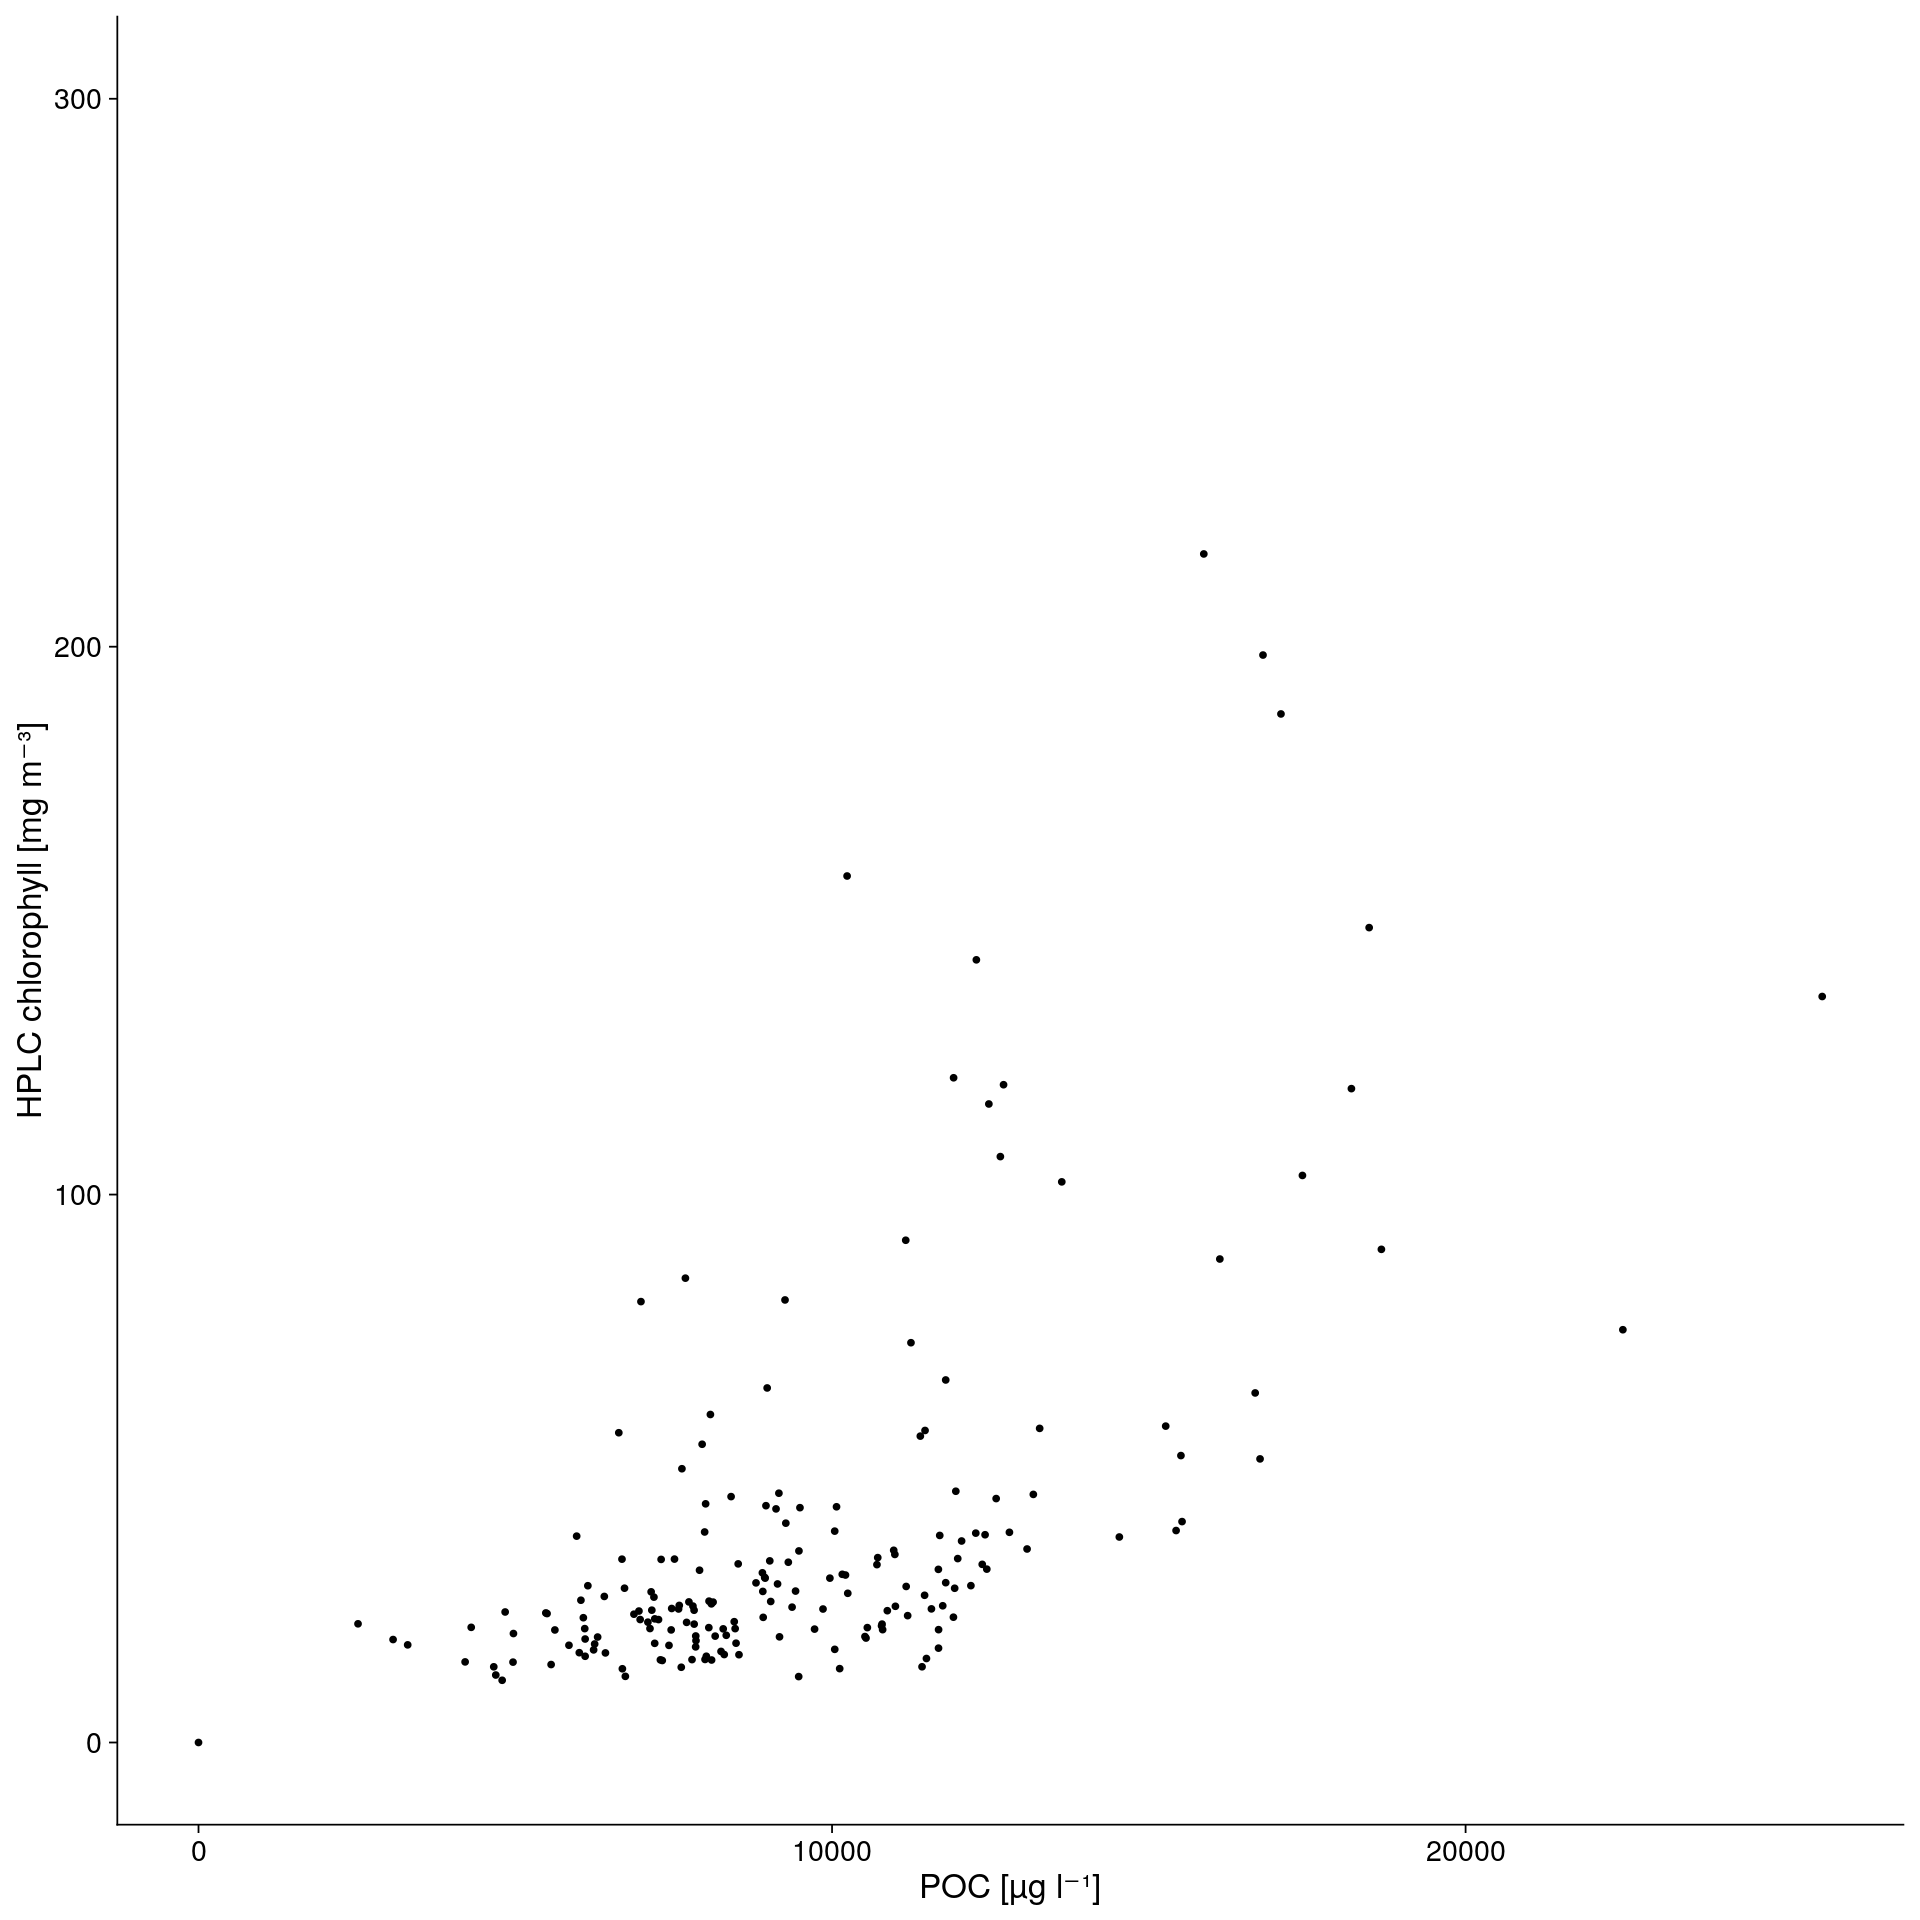

In [248]:
#CHlaHPLCFluorCOMP <- 
ggplot(data=chlaPOC, aes(x=value_int,y=Chla)) + 
geom_point() + theme_cowplot(20) + 
ylab('HPLC chlorophyll [mg m⁻³]') + xlab('POC [µg l⁻¹]') + ylim(0,300)#+xlim(0,300)

In [245]:
cor.test(chlaPOC$value_int,chlaPOC$Chla)


	Pearson's product-moment correlation

data:  chlaPOC$value_int and chlaPOC$Chla
t = 10.75, df = 189, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.5194445 0.6970137
sample estimates:
      cor 
0.6159941 
